In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
a= pd.read_csv("D:/download/Excle practice data/titanic.csv")
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


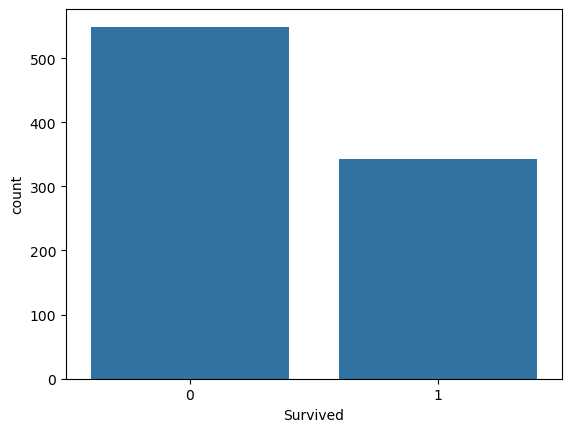

In [3]:
sb.countplot(x="Survived",data=a)
plt.show()

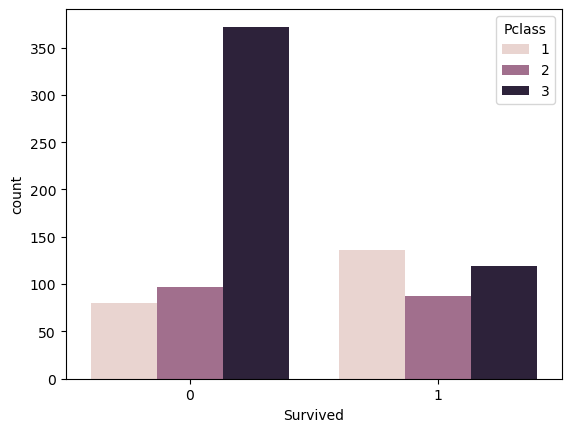

In [4]:
sb.countplot(x="Survived",hue="Pclass",data=a)
plt.show()

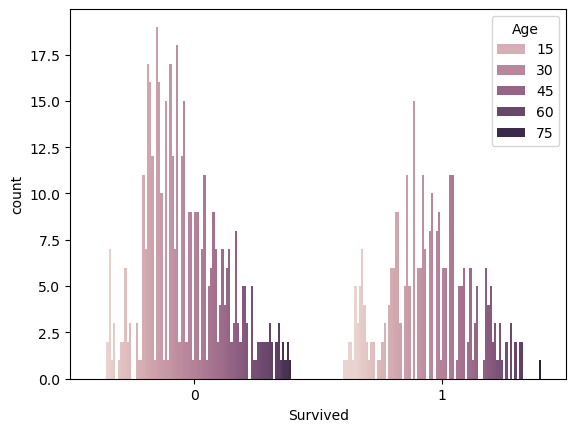

In [5]:
sb.countplot(x="Survived",hue="Age",data=a)
plt.show()

In [6]:
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
a.drop('Cabin',axis=1,inplace=True)
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
a.dropna(inplace=True)
a.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
pd.get_dummies(a["Sex"])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [10]:
male=pd.get_dummies(a["Sex"],drop_first=True)
male.head()

,male
0,True
1,False
2,False
3,False
4,True


In [11]:
pd.get_dummies(a["Embarked"])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
885,False,True,False
886,False,False,True
887,False,False,True
889,True,False,False


In [12]:
emb=pd.get_dummies(a["Embarked"],drop_first=True)
emb.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [13]:
pd.get_dummies(a["Pclass"])

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
885,False,False,True
886,False,True,False
887,True,False,False
889,True,False,False


In [14]:
cls=pd.get_dummies(a["Pclass"],drop_first=True)
cls.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [15]:
x=pd.concat([a,male,emb,cls],axis=1)
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [16]:
z=x.drop(["Name","Sex","PassengerId","Age","Ticket","Fare","Embarked"],axis=1)
z.head()

,Survived,Pclass,SibSp,Parch,male,Q,S,2,3
0,0,3,1,0,True,False,True,False,True
1,1,1,1,0,False,False,False,False,False
2,1,3,0,0,False,False,True,False,True
3,1,1,1,0,False,False,True,False,False
4,0,3,0,0,True,False,True,False,True


In [17]:
X=z.drop("Survived",axis=1)
X.head()

,Pclass,SibSp,Parch,male,Q,S,2,3
0,3,1,0,True,False,True,False,True
1,1,1,0,False,False,False,False,False
2,3,0,0,False,False,True,False,True
3,1,1,0,False,False,True,False,False
4,3,0,0,True,False,True,False,True


In [18]:
Y=z[["Survived"]]

In [19]:
X.columns=X.columns.astype(str) 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (569, 8)
Y_train shape: (569, 1)


In [23]:
log = LogisticRegression()
log.fit(X_train,Y_train)

D:\New folder\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
predict=log.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
classification_report(Y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.76      0.82      0.79        80\n           1       0.75      0.67      0.71        63\n\n    accuracy                           0.76       143\n   macro avg       0.75      0.75      0.75       143\nweighted avg       0.75      0.76      0.75       143\n'

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(Y_test,predict)

array([[66, 14],
       [21, 42]], dtype=int64)